In [336]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn

#import new data set

In [337]:
df=pd.read_csv(r'train.csv')

In [338]:
df.head()

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,1,@user123,2024-11-03 08:45:00,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,120,450,positive
1,2,@politicsFan,2024-11-03 09:15:23,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,85,300,positive
2,3,@greenAdvocate,2024-11-03 10:05:45,Jill Stein's environmental plans are exactly w...,Jill Stein,Green Party,60,200,positive
3,4,@indieVoice,2024-11-03 11:20:10,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,Independent,40,150,neutral
4,5,@libertyLover,2024-11-03 12:35:55,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,Libertarian Party,30,120,positive


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     500 non-null    int64 
 1   user_handle  500 non-null    object
 2   timestamp    500 non-null    object
 3   tweet_text   500 non-null    object
 4   candidate    500 non-null    object
 5   party        500 non-null    object
 6   retweets     500 non-null    int64 
 7   likes        500 non-null    int64 
 8   sentiment    500 non-null    object
dtypes: int64(3), object(6)
memory usage: 35.3+ KB


In [340]:
df.isnull().sum()

tweet_id       0
user_handle    0
timestamp      0
tweet_text     0
candidate      0
party          0
retweets       0
likes          0
sentiment      0
dtype: int64

In [341]:
df.describe()

,tweet_id,retweets,likes
count,500.000000,500.000000,500.000000
mean,250.500000,64.236000,248.920000
std,144.481833,27.715349,120.562034
min,1.000000,18.000000,85.000000
25%,125.750000,40.000000,150.000000
50%,250.500000,70.000000,225.000000
75%,375.250000,90.000000,340.000000
max,500.000000,120.000000,500.000000


In [342]:
# Fill or drop missing values (example shown: dropping rows with missing values)

#df=df.drop(inplace=True)

In [343]:
df=df.drop_duplicates()


### feature engineering

In [344]:
### feature engineering
#1. create new features
#2encode categorical variables
#3 normilize  or scale numerical features


In [345]:
df.head(2)

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,1,@user123,2024-11-03 08:45:00,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,120,450,positive
1,2,@politicsFan,2024-11-03 09:15:23,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,85,300,positive


In [346]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
label_encoders=LabelEncoder()

### encode categorical features

In [347]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Example: Encoding categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    df[col] = label_encoders[col].fit_transform(df[col])


In [348]:
df

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,1,416,205,40,3,0,120,450,2
1,2,288,206,39,1,4,85,300,2
2,3,84,207,57,2,1,60,200,2
3,4,171,208,134,4,2,40,150,1
4,5,181,209,31,0,3,30,120,2
...,...,...,...,...,...,...,...,...,...
495,496,414,200,88,3,0,95,360,2
496,497,48,201,168,1,4,100,440,1
497,498,102,202,77,2,1,75,240,2
498,499,164,203,138,4,2,18,85,1


In [349]:
#slicing numerical columns features
scaler=StandardScaler()
num_col=df.select_dtypes(include=['float64','int64']).columns
df[num_col]=scaler.fit_transform(df[num_col])

In [350]:
print("after feature engineering :", df)

after feature engineering :      tweet_id  user_handle  timestamp  tweet_text  candidate  party  retweets  \
0   -1.728590          416        205          40          3      0  2.014041   
1   -1.721662          288        206          39          1      4  0.749938   
2   -1.714734           84        207          57          2      1 -0.152993   
3   -1.707806          171        208         134          4      2 -0.875337   
4   -1.700877          181        209          31          0      3 -1.236509   
..        ...          ...        ...         ...        ...    ...       ...   
495  1.700877          414        200          88          3      0  1.111110   
496  1.707806           48        201         168          1      4  1.291696   
497  1.714734          102        202          77          2      1  0.388766   
498  1.721662          164        203         138          4      2 -1.669916   
499  1.728590          186        204          11          0      3 -0.875337   


In [351]:
df.columns

Index(['tweet_id', 'user_handle', 'timestamp', 'tweet_text', 'candidate',
       'party', 'retweets', 'likes', 'sentiment'],
      dtype='object')

In [352]:
df.isnull().sum()

tweet_id       0
user_handle    0
timestamp      0
tweet_text     0
candidate      0
party          0
retweets       0
likes          0
sentiment      0
dtype: int64

### Step 4: Train a Machine Learning Model


In [353]:
#Split the data into training and testing sets.
#Train a simple machine learning model (e.g., Logistic Regression).
#Evaluate the model.

In [354]:
from sklearn.model_selection import train_test_split


In [355]:
#split data feature and traget
y=df.drop('sentiment',axis=1)

In [356]:
y

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes
0,-1.728590,416,205,40,3,0,2.014041,1.669525
1,-1.721662,288,206,39,1,4,0.749938,0.424107
2,-1.714734,84,207,57,2,1,-0.152993,-0.406173
3,-1.707806,171,208,134,4,2,-0.875337,-0.821312
4,-1.700877,181,209,31,0,3,-1.236509,-1.070396
...,...,...,...,...,...,...,...,...
495,1.700877,414,200,88,3,0,1.111110,0.922274
496,1.707806,48,201,168,1,4,1.291696,1.586498
497,1.714734,102,202,77,2,1,0.388766,-0.074061
498,1.721662,164,203,138,4,2,-1.669916,-1.360994


In [357]:
X=df.drop('sentiment',axis=1)

In [358]:
X

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes
0,-1.728590,416,205,40,3,0,2.014041,1.669525
1,-1.721662,288,206,39,1,4,0.749938,0.424107
2,-1.714734,84,207,57,2,1,-0.152993,-0.406173
3,-1.707806,171,208,134,4,2,-0.875337,-0.821312
4,-1.700877,181,209,31,0,3,-1.236509,-1.070396
...,...,...,...,...,...,...,...,...
495,1.700877,414,200,88,3,0,1.111110,0.922274
496,1.707806,48,201,168,1,4,1.291696,1.586498
497,1.714734,102,202,77,2,1,0.388766,-0.074061
498,1.721662,164,203,138,4,2,-1.669916,-1.360994


In [359]:
X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [360]:
X_train

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes
249,-0.003464,209,454,22,0,3,-0.514165,-0.613742
433,1.271328,138,138,150,4,2,-1.236509,-1.111910
19,-1.596954,49,224,20,0,3,-0.875337,-0.904340
322,0.502296,229,27,191,1,4,0.930524,1.254386
332,0.571578,99,37,77,2,1,0.388766,-0.074061
...,...,...,...,...,...,...,...,...
106,-0.994199,39,311,165,1,4,1.291696,1.586498
270,0.142028,377,475,109,3,0,0.930524,0.756218
348,0.682429,153,53,130,4,2,-1.308744,-1.194938
435,1.285184,9,140,65,2,1,0.027594,-0.240117


In [361]:
X_train.shape,y_train.shape

((400, 8), (100, 8))

### apply logistic  regression

In [362]:

from sklearn.linear_model import LinearRegression


<Axes: xlabel='sentiment', ylabel='count'>

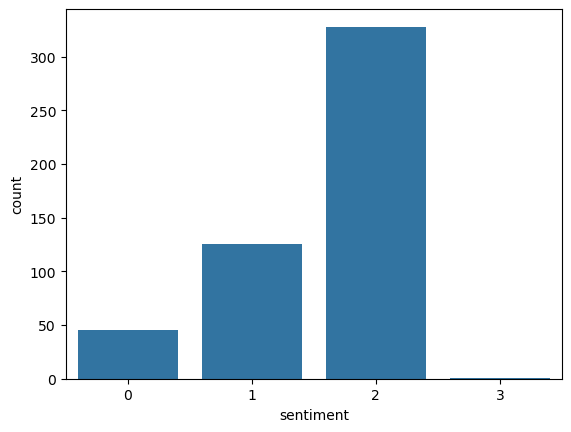

In [363]:
sns.countplot(x='sentiment',data=df)


In [ ]:
df

In [365]:
from sklearn.model_selection import train_test_split

# Split dataset into features (X) and target (y)
X = df.drop("sentiment", axis=1)  # Replace 'sentiment' with your target column
y = df["sentiment"]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (375, 8)
y_train shape: (375,)


In [366]:
# Filter data (if applicable) and ensure consistency
X = X.loc[y.index]  # Align features with target


In [377]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))


Logistic Regression Accuracy: 0.872


C:\Users\hi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [376]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))


Decision Tree Accuracy: 0.976


In [375]:
from sklearn.metrics import accuracy_score

log_pred = log_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))


Logistic Regression Accuracy: 0.944


In [378]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [382]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.976


In [383]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))


XGBoost Accuracy: 0.976
